In [1]:
from tellus.sar.tellusar import TelluSAR
import os
from PIL import Image

In [2]:
# Set the Tellus API Token
token = "Your API Token"
tellus = TelluSAR(token)

In [3]:
# Get scene list
scene_list = tellus.get_free_scene()
for scene in scene_list["data"]["scenes"][:10]:
    print(scene["scene_id"], scene["observation_datetime"], scene["polarisations"])

ALOS2010643060-140804 2014-08-04T02:31:24+00:00 ['HH']
ALOS2010643070-140804 2014-08-04T02:31:32+00:00 ['HH']
ALOS2010643080-140804 2014-08-04T02:31:40+00:00 ['HH']
ALOS2010643130-140804 2014-08-04T02:32:21+00:00 ['HH']
ALOS2010652630-140804 2014-08-04T04:02:59+00:00 ['VV']
ALOS2010652640-140804 2014-08-04T04:03:07+00:00 ['VV']
ALOS2010792700-140805 2014-08-05T02:47:25+00:00 ['HH']
ALOS2010792710-140805 2014-08-05T02:47:33+00:00 ['HH']
ALOS2010792720-140805 2014-08-05T02:47:41+00:00 ['HH']
ALOS2010792750-140805 2014-08-05T02:48:05+00:00 ['HH', 'HV', 'VH', 'VV']


In [4]:
# Get scenes that can be processed with differential interference
scene_id = scene_list["data"]["scenes"][0]["scene_id"]
print(scene_id)
after_scene_list = tellus.get_scene_after(scene_id)
for scene in after_scene_list["data"]["scenes"]:
    print(scene["scene_id"], scene["observation_datetime"], scene["polarisations"])

ALOS2010643060-140804
ALOS2020993060-141013 2014-10-13T02:31:24+00:00 ['HH']
ALOS2068603060-150831 2015-08-31T02:31:18+00:00 ['HH']
ALOS2078953060-151109 2015-11-09T02:31:18+00:00 ['HH']
ALOS2107933060-160523 2016-05-23T02:31:15+00:00 ['HH']
ALOS2118283060-160801 2016-08-01T02:31:16+00:00 ['HH']
ALOS2128633060-161010 2016-10-10T02:31:16+00:00 ['HH']
ALOS2130703060-161024 2016-10-24T02:31:16+00:00 ['HH']
ALOS2215573060-180521 2018-05-21T02:31:13+00:00 ['HH']
ALOS2225923060-180730 2018-07-30T02:31:13+00:00 ['HH']
ALOS2238343060-181022 2018-10-22T02:31:14+00:00 ['HH']
ALOS2254903060-190211 2019-02-11T02:31:16+00:00 ['HH']
ALOS2362543060-210208 2021-02-08T02:31:19+00:00 ['HH']


In [5]:
# Request to retrieve the difference
before = scene_id
after = after_scene_list["data"]["scenes"][0]["scene_id"]
polarisation = "HH"
work_result = tellus.request_work(before, after, polarisation)
works = work_result["data"]["works"]
for work in works:
    print(work["work_id"], work["complete_date"])

523 2021-05-12T07:06:22+00:00


In [6]:
work_id = works[0]["work_id"]

In [7]:
# Check the status of the process
work_result = tellus.get_work_list()
works = work_result["data"]["works"]
for work in works:
    print(work["work_id"], work["complete_date"])

523 2021-05-12T07:06:22+00:00


In [8]:
# Download the results
output = "./TelluSAR.png"
tellus.download(output, work_id, 10, 906, 404)

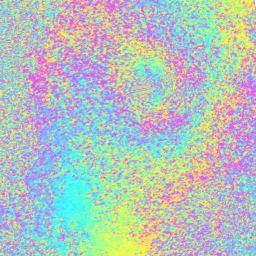

In [9]:
# Original data provided by JAXA
img = Image.open(output)
img